In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mypath = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/Salary_prediction/'
df = pd.read_csv(mypath + 'salary_global_data.csv')

In [3]:
df.describe(include='all')

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
count,221,221,221,221.000000,221.000000,221.000000,221.000000
unique,221,9,1,NaN,NaN,NaN,NaN
top,Afghanistan,Africa,Monthly,NaN,NaN,NaN,NaN
freq,1,57,221,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1762.631906,1982.339812,502.783204,8802.165619
std,NaN,NaN,NaN,1634.708716,1835.429193,470.073328,8140.210641
min,NaN,NaN,NaN,0.261335,0.285524,0.072092,1.271103
25%,NaN,NaN,NaN,567.210000,651.000000,163.930000,2900.480000
50%,NaN,NaN,NaN,1227.460000,1344.230000,339.450000,5974.360000
75%,NaN,NaN,NaN,2389.010000,2740.000000,690.000000,12050.740000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [6]:
df.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [61]:
a = df[(df['average_salary'] <=0)]
a.head()


,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary


In [28]:
for col in df.columns:
    if df[col].dtype != 'object':
        print(col)
        # print(df[col].unique())

median_salary
average_salary
lowest_salary
highest_salary


In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())

country_name
['Afghanistan' 'Aland Islands' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Congo Democratic Republic' 'Cook Islands' 'Costa Rica'
 'Cote Divoire' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada

In [64]:
mypalette = sns.husl_palette(h=.5)
sns.set_palette(mypalette)

In [ ]:
# how much salary spread by continent?

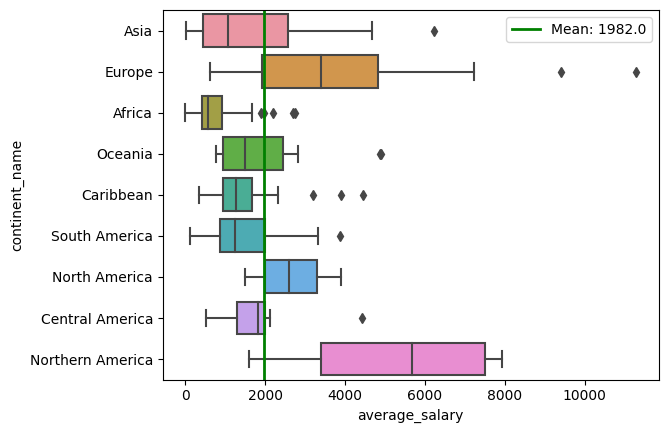

In [65]:
ax = sns.boxplot(data=df, x=df['average_salary'], y=df['continent_name'])
ax.axvline(df['average_salary'].mean(), color='green', linewidth=2, label=f"Mean: {round(df['average_salary'].mean(), 0)}")
ax.legend()


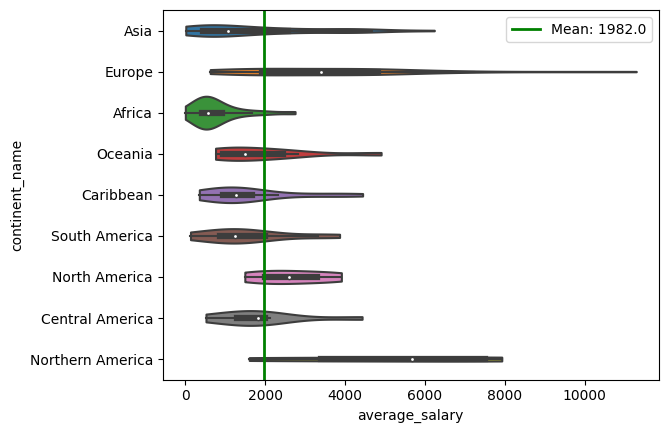

In [63]:
ax = sns.violinplot(data=df, x=df['average_salary'], y=df['continent_name'], cut=0)
ax.axvline(df['average_salary'].mean(), color='green', linewidth=2, label=f"Mean: {round(df['average_salary'].mean(), 0)}")
ax.legend()

In [45]:
len(df.columns)

7

median_salary
average_salary
lowest_salary
highest_salary


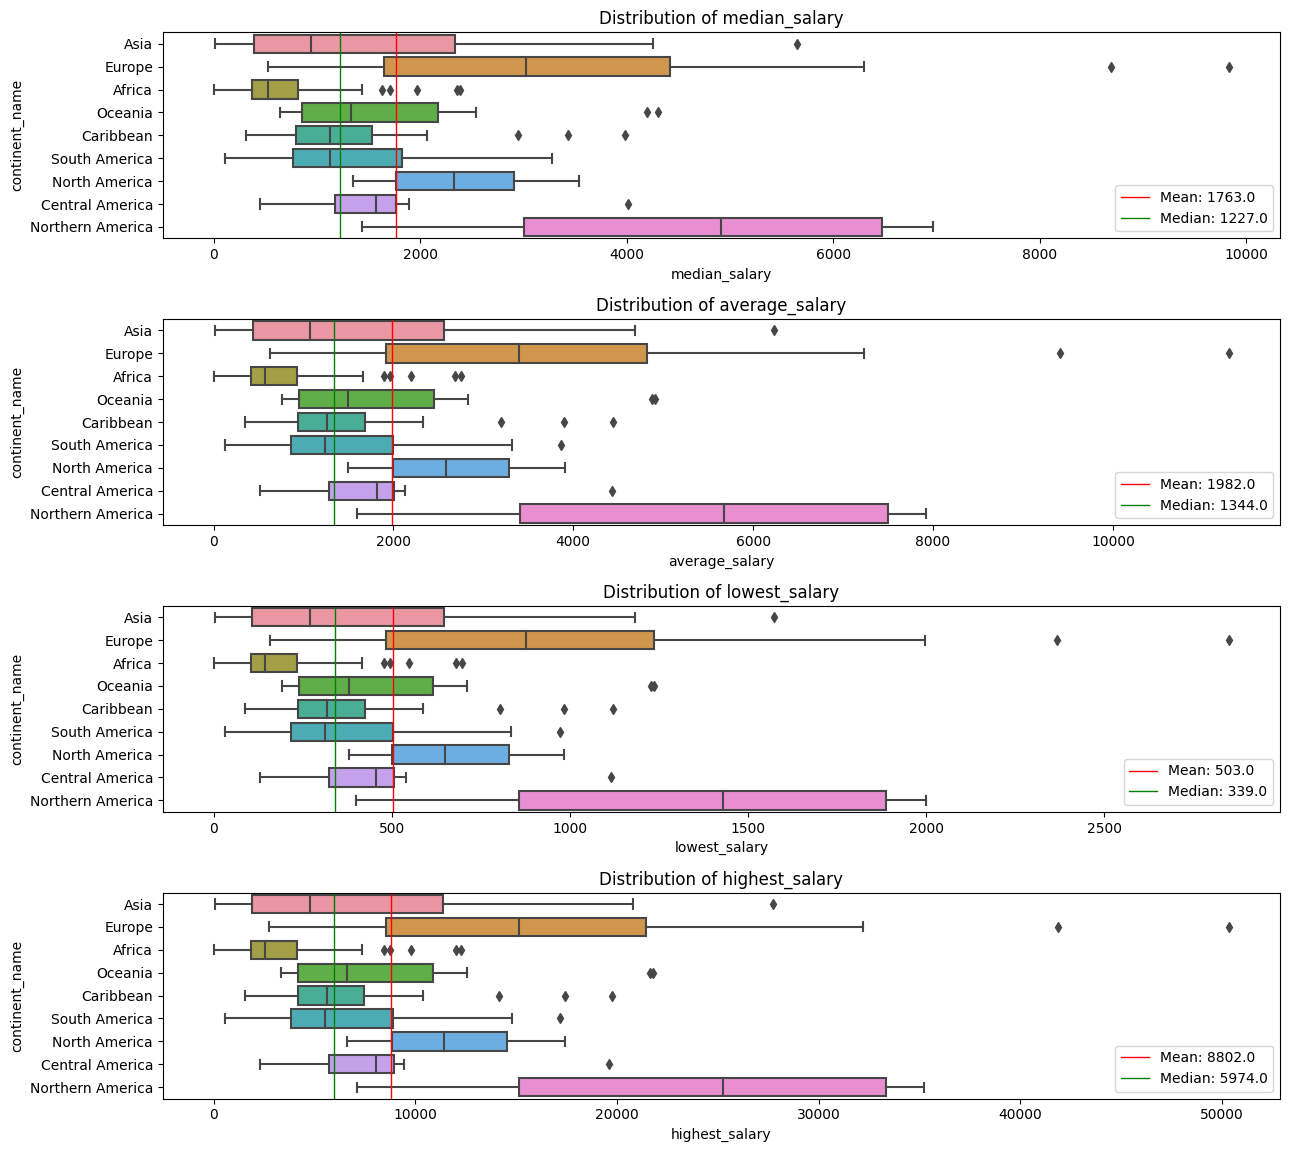

In [67]:
ncols = len(df.columns)
nrows = 1
fig, axes = plt.subplots(ncols, nrows,figsize=(13,20))

# axes = axes.flatten()
for ax, feature in zip(axes.T.ravel(), df.columns):
    if df[feature].dtype != 'object':
        print(feature)
        # sns.boxplot(data=df, x=df[col], ax=ax)
        sns.boxplot(data=df, y=df['continent_name'], x =feature,  ax=ax)
        ax.axvline(df[feature].mean(), color='r', lw=1, label=f"Mean: {round(df[feature].mean(), 0)}")
        ax.axvline(df[feature].median(), color='g', lw=1, label=f"Median: {round(df[feature].median(), 0)}")
        ax.set_title(f'Distribution of {feature}')
        ax.legend()
    else:
        ax.remove()  # Remove the subplot if the condition is not met
    # ax.set_title(f'Distribution of {feature}')
    # ax.set_xlabel('Value')
    # ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [75]:
# top N of salary based on country
top_n = df.nlargest(10, 'average_salary')
# Add an 'order' column
top_n['order'] = range(1, len(top_n) + 1)

# Reset the index
top_n.reset_index(drop=True, inplace=True)
top_n


,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary,order
0,Switzerland,Europe,Monthly,9836.07,11292.90,2850.27,50363.93,1
1,Guernsey,Europe,Monthly,8689.02,9409.76,2367.07,41869.51,2
2,United States,Northern America,Monthly,6966.00,7925.00,2000.00,35250.00,3
3,Canada,Northern America,Monthly,6311.03,7352.94,1850.00,32720.59,4
4,United Kingdom,Europe,Monthly,6300.00,7235.37,1829.27,32214.63,5
5,Belgium,Europe,Monthly,5729.39,6522.20,1997.89,27378.44,6
6,Jersey,Europe,Monthly,5817.07,6304.88,1585.37,28048.78,7
7,Singapore,Asia,Monthly,5647.06,6235.29,1573.53,27720.59,8
8,Liechtenstein,Europe,Monthly,5224.04,5825.14,1464.48,25901.64,9
9,Denmark,Europe,Monthly,5084.99,5779.04,1458.92,25637.39,10


In [77]:
top_N_by_continent = df.groupby('continent_name').apply(lambda x: x.nlargest(10, 'average_salary')).reset_index(drop=True)
top_N_by_continent

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Mayotte,Africa,Monthly,2389.01,2748.41,697.67,12262.16
1,British Indian Ocean Territory,Africa,Monthly,2360.00,2690.00,680.00,12000.00
2,Reunion,Africa,Monthly,1966.17,2198.73,549.68,9767.44
3,Cape Verde,Africa,Monthly,1706.29,1965.11,495.59,8742.33
4,Morocco,Africa,Monthly,1634.24,1896.89,477.63,8433.85
...,...,...,...,...,...,...,...
73,Ecuador,South America,Monthly,1260.00,1370.00,340.00,6080.00
74,Bolivia,South America,Monthly,1131.50,1236.99,312.14,5505.78
75,Colombia,South America,Monthly,995.60,1157.85,292.53,5137.79
76,Paraguay,South America,Monthly,1019.69,1126.17,283.93,5009.74


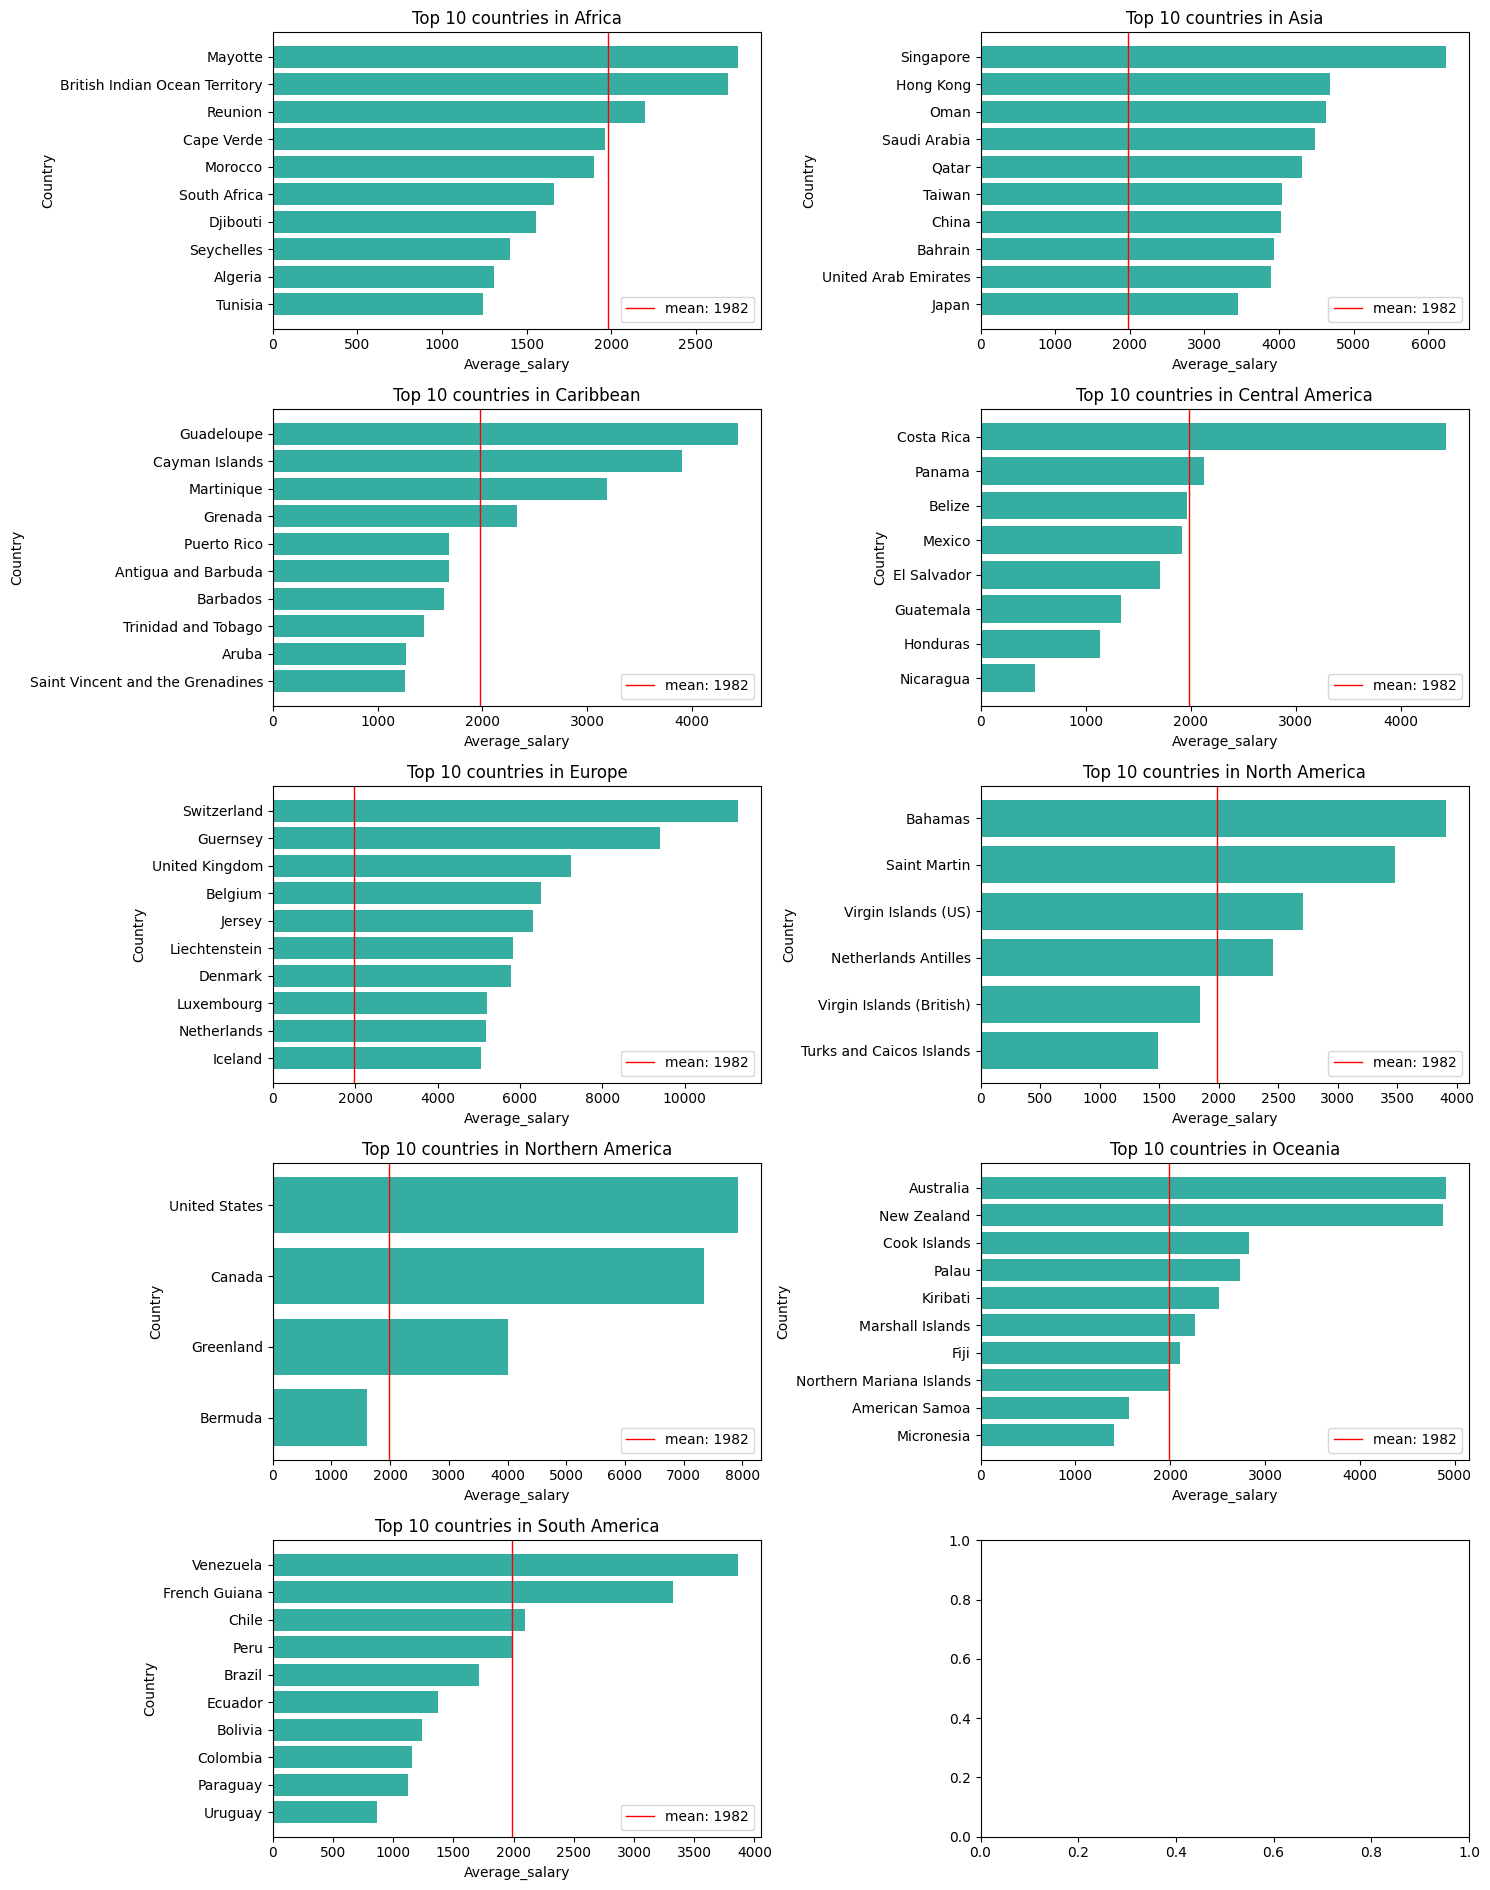

In [171]:
# Define the number of top records you want for each group
N = 10
df = df.sort_values(by='average_salary', ascending=True)
num_continents = len(df['continent_name'].unique())
nrows = (num_continents + 1) // 2

# Group by 'continent' and iterate over each group
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 19))

for i, (continent, group) in enumerate(df.groupby('continent_name')):
    # Get the top N records for the current continent
    top_N_countries = group.nlargest(N, 'average_salary').sort_values(by='average_salary', ascending=True)
    
    # Plot the top N countries for the current continent
    ax = axs[i // 2, i % 2]
    ax.barh(top_N_countries['country_name'], top_N_countries['average_salary'])
    ax.axvline(df['average_salary'].mean(), lw = 1, color = 'r', label=f"mean: {round(df['average_salary'].mean())}")
    ax.legend()
    ax.set_title(f"Top {N} countries in {continent}")
    ax.set_xlabel('Average_salary')
    ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

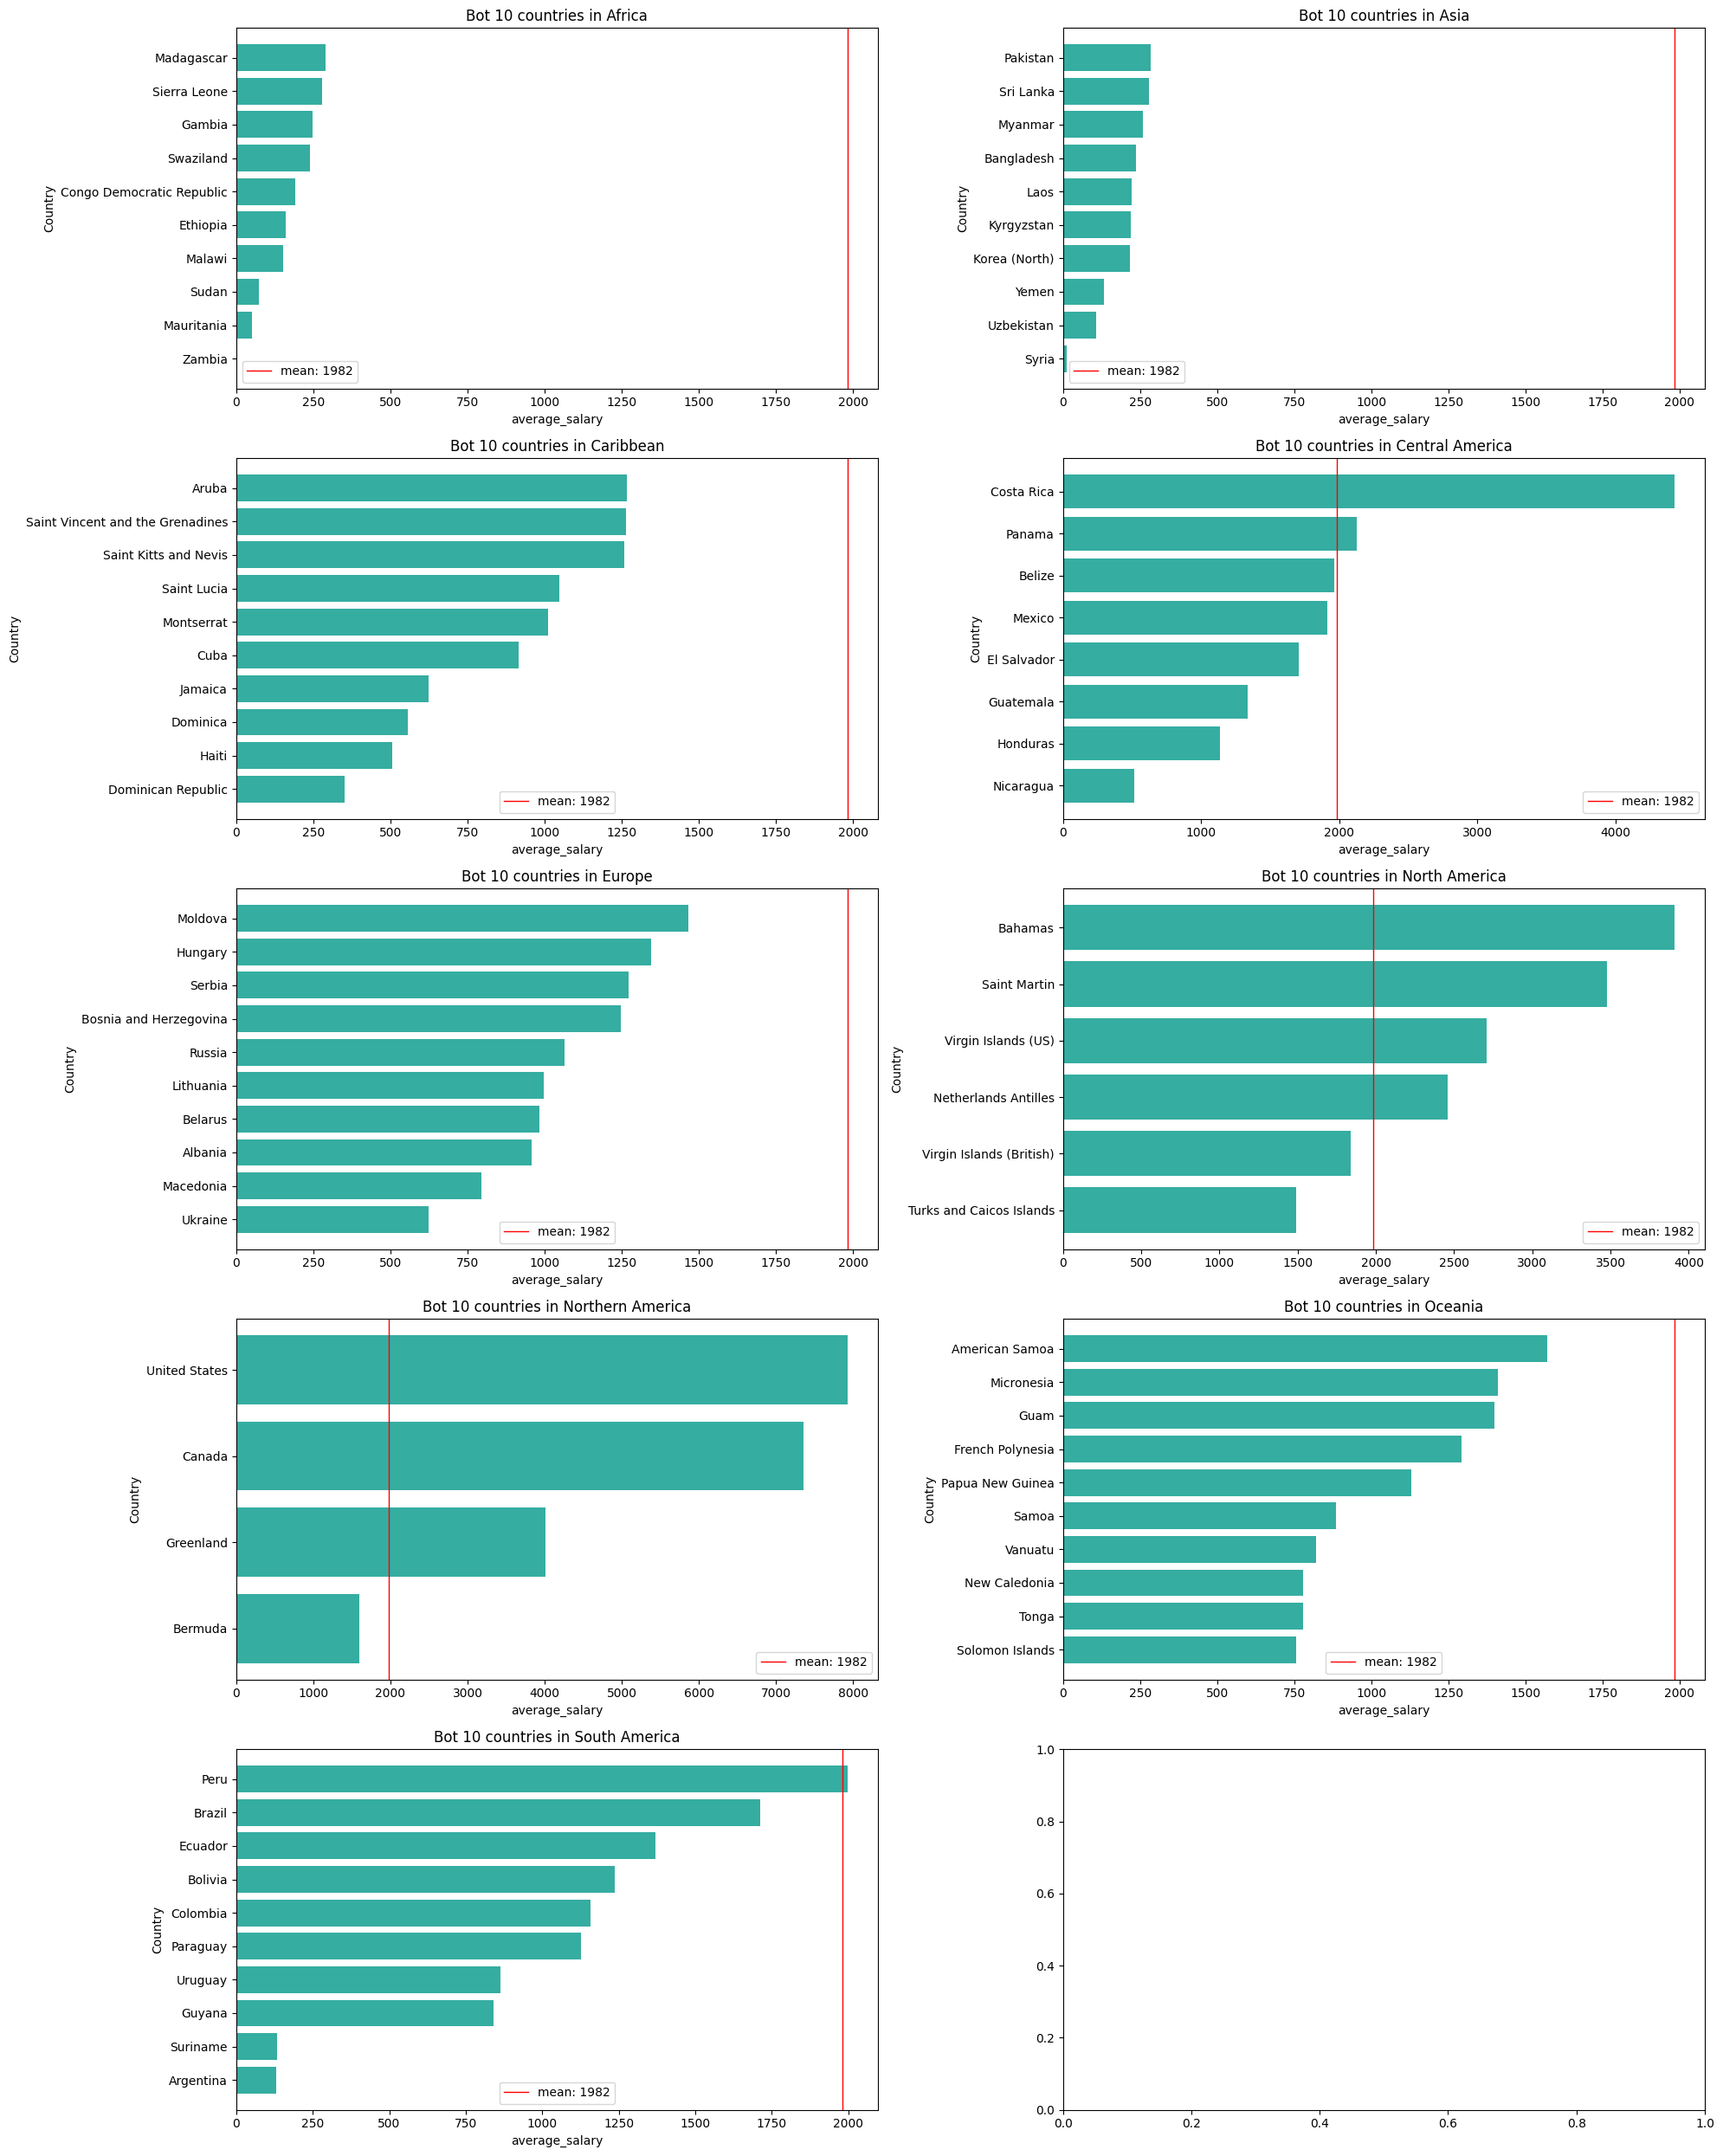

In [168]:
# Define the number of top records you want for each group
N = 10
num_continents = len(df['continent_name'].unique())
nrows = (num_continents + 1) // 2

# Group by 'continent' and iterate over each group
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 25))

for i, (continent, group) in enumerate(df.groupby('continent_name')):
    # Get the top N records for the current continent
    bot_N_countries = group.nsmallest(N, 'average_salary')
    
    # Plot the top N countries for the current continent
    ax = axs[i // 2, i % 2]
    ax.barh(bot_N_countries['country_name'], bot_N_countries['average_salary'])
    ax.axvline(df['average_salary'].mean(), lw = 1, color = 'r', label=f"mean: {round(df['average_salary'].mean())}")
    ax.legend()
    ax.set_title(f"Bot {N} countries in {continent}")
    ax.set_xlabel('average_salary')
    ax.set_ylabel('Country')

plt.tight_layout()
plt.show()

In [155]:
df = df.sort_values(by=['average_salary'], ascending=[False])
# sorted_df.reset_index()
# Add an 'order' column
df['order'] = range(1, len(df) + 1)

# Reset the index
df.reset_index(drop=True, inplace=True)

# locate Vietnam in the globe
df[df['country_name']=='Vietnam']

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary,order
162,Vietnam,Asia,Monthly,612.57,711.24,179.25,3161.52,163


In [153]:
# locate Vietnam Asia
df_asia = df[(df['continent_name']=='Asia')]
sorted_df = df_asia.sort_values(by=['continent_name','average_salary'], ascending=[True, False])
# sorted_df.reset_index()
# Add an 'order' column
sorted_df['order'] = range(1, len(sorted_df) + 1)


# Reset the index
sorted_df.reset_index(drop=True, inplace=True)

sorted_df[sorted_df['country_name']=='Vietnam']

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary,order
32,Vietnam,Asia,Monthly,612.57,711.24,179.25,3161.52,33


c:\Users\84393\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

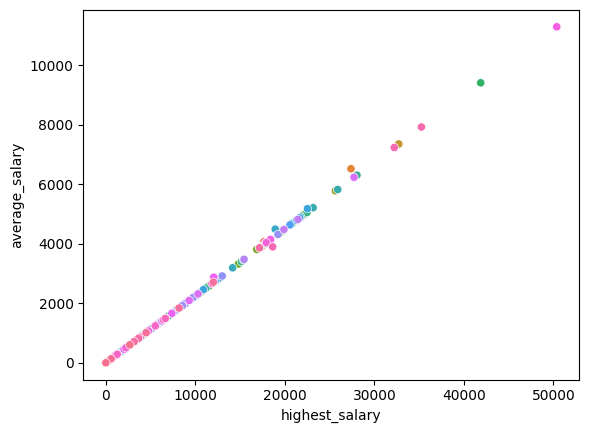

In [127]:
sns.scatterplot(data = df, x='highest_salary', y = 'average_salary', hue="country_name", cmap='viridis', legend=None)  # 'viridis' is a colormap that goes from blue to yellow
plt.xlabel(labelpad=10)  # Add padding to the x-label
plt.ylabel(labelpad=10)  # Add padding to the y-label
# plt.title('Plot with Highlighted Data Point')

plt.grid(True)  # Add grid lines for better visualization
plt.show()

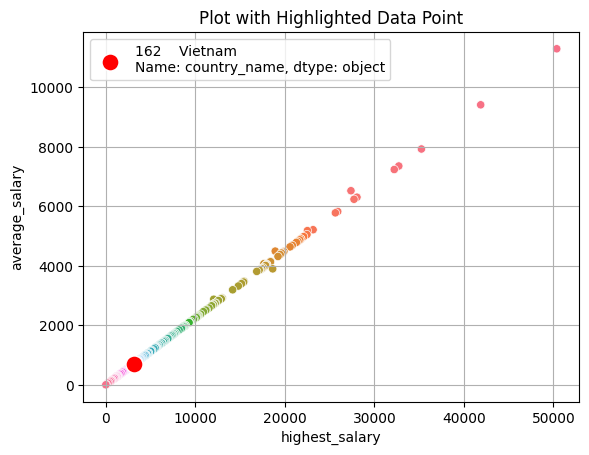

In [157]:
sns.scatterplot(data = df, x='highest_salary', y = 'average_salary', hue="country_name", color ='w', legend=None)

# Plot the highlighted point separately
# Define the filter condition
filter_condition = df['country_name'] == 'Vietnam'

filtered_values_column_x = df.loc[filter_condition, 'highest_salary']
highlighted_x = filtered_values_column_x  # X-coordinate of the highlighted point

filtered_values_column_y = df.loc[filter_condition, 'average_salary']
highlighted_y = filtered_values_column_y # Y-coordinate of the highlighted point

sns.scatterplot(x=highlighted_x, y=highlighted_y, color='red', s=150, label=f"{df.loc[filter_condition, 'country_name']}")  

plt.title('Plot with Highlighted Data Point')

plt.legend()  # Show the legend to indicate the highlighted data point
plt.grid(True)  # Add grid lines for better visualization
plt.show()

In [147]:
filter_condition = df[df['country_name'] == 'Vietnam'].sort_values(by=['average_salary'], ascending=[False])
filter_condition

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
214,Vietnam,Asia,Monthly,612.57,711.24,179.25,3161.52
